# Docling Graph Extraction

Docling provides the capability of extracting information, i.e. structured data, from unstructured documents.

The user can provide the desired data schema AKA *template*, either as a Pydantic model, and Docling will return
the extracted data as a knowledge graph.

In [ ]:
%pip install -q docling[vlm]  # Install the Docling package with VLM support
%pip install pydantic rich pymupdf

In [1]:
import os, sys
sys.path.append('.')  # Ensure current directory is in the path

from rich import print
from IPython.display import Image, HTML, display

import fitz
from pydantic import BaseModel, Field
from typing import Optional, List, Any

In this notebook, we will work with an example input image:

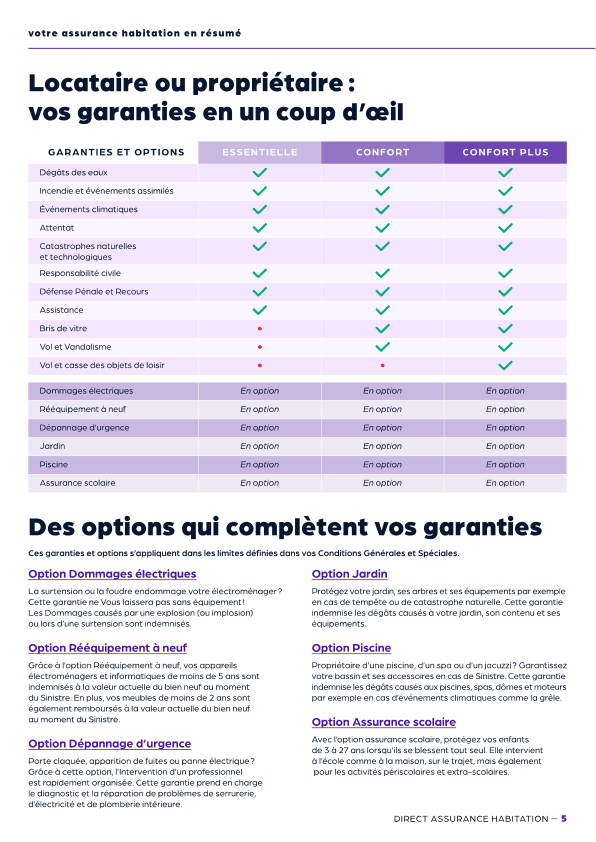

In [5]:
file_path = "data/assurance_options.pdf"

# Detect file extension
ext = os.path.splitext(file_path)[1].lower()

if ext == ".pdf":
    # Convert first page of PDF to image
    doc = fitz.open(file_path)
    page = doc.load_page(0)
    pix = page.get_pixmap()
    output_image = "data/page_preview.png"
    pix.save(output_image)
    display(Image(filename=output_image))
    
elif ext in [".png", ".jpg", ".jpeg", ".gif", ".bmp"]:
    # Directly display the image
    display(HTML(f"<img src='{file_path}' height='600'>"))
    
else:
    print(f"Unsupported file type: {ext}")

## 1. Define the Docling Extractor Configuration

Let's first define our extractor:

In [6]:
from docling.datamodel.base_models import InputFormat
from docling.document_extractor import DocumentExtractor

extractor = DocumentExtractor(allowed_formats=[InputFormat.IMAGE, InputFormat.PDF])

# Verify the updated vlm_options
pipeline = extractor._get_pipeline(InputFormat.PDF)
print(f"[bold green]Pipeline initiated successfully using:[/bold green] {pipeline.pipeline_options.vlm_options.repo_id}")

Pipeline initiated successfully using: numind/NuExtract-2.0-2B

(OPTIONAL) - Use a different VLM for information extraction

In [3]:
from docling.datamodel.base_models import InputFormat
from docling.document_extractor import DocumentExtractor, ExtractionFormatOption
from docling.pipeline.extraction_vlm_pipeline import ExtractionVlmPipeline
from docling.backend.pypdfium2_backend import PyPdfiumDocumentBackend

# Get the default pipeline options
# This configuration will be shared by both PDF and Image formats.
pipeline_options = ExtractionVlmPipeline.get_default_options()

# Modify the model repository ID
pipeline_options.vlm_options.repo_id = "numind/NuExtract-2.0-8B"

# Create custom format options for both PDF and Image
# We add an entry for InputFormat.IMAGE, using the same modified pipeline_options.
custom_format_options = {
    InputFormat.PDF: ExtractionFormatOption(
        pipeline_cls=ExtractionVlmPipeline,
        backend=PyPdfiumDocumentBackend,
        pipeline_options=pipeline_options
    ),
    InputFormat.IMAGE: ExtractionFormatOption(
        pipeline_cls=ExtractionVlmPipeline,
        backend=PyPdfiumDocumentBackend, # The default backend for images also works well
        pipeline_options=pipeline_options
    )
}

# Initialize the DocumentExtractor with the custom options
extractor = DocumentExtractor(
    allowed_formats=[InputFormat.IMAGE, InputFormat.PDF],
    extraction_format_options=custom_format_options
)

# Verify the updated vlm_options
pipeline = extractor._get_pipeline(InputFormat.PDF)
print(f"[bold green]Pipeline initiated successfully using:[/bold green] {pipeline.pipeline_options.vlm_options.repo_id}")

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Pipeline initiated successfully using: numind/NuExtract-2.0-8B

## 2. Define the Pydantic Model Template

### 2.1. Load the Pydantic Model

You can create a new Pydantic model in the tempalte directory then load it here:

In [7]:
try:
    from templates.insurance import HomeInsurance as Template
    print("[bold green]Template loaded successfully.[/bold green]")
    
except ImportError:
    print("[bold red]Error: Could not find specified template.[/bold red]")
    print("Please make sure the schema file exists in a 'templates' subfolder and that the notebook is running from the correct parent directory.")

except Exception as e:
    print(f"[bold red]An unexpected error occurred: {e}[/bold red]")

Template loaded successfully.

### 2.2. Extract Information using Docling and the Pydantic Template

In [8]:
result = extractor.extract(
    source=file_path,
    template=Template,
)

print(result.pages)

c:\Users\Ayoub\miniconda3\envs\docling\Lib\site-packages\docling\document_extractor.py:143: UserWarning: The extract API is currently experimental and may change without prior notice.
Only PDF and image formats are supported.
  return next(all_res)
The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


[
    ExtractedPageData(
        page_no=1,
        extracted_data={
            'product_name': 'Assurance Habitation',
            'all_guarantees': [
                {
                    'name': 'Dégâts des eaux',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Incendie et événements assimilés',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Événements climatiques',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Attentat',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Catastrophes naturelles et technologiques',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Responsabilité civile',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Défense Pénale et Recours',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Assistance',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Bris de vitre',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Vol et Vandalisme',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Vol et casse des objets de loisir',
                    'description': None,
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Dommages électriques',
                    'description': 'En option',
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Rééquipement à neuf',
                    'description': 'En option',
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': "Dépannage d'urgence",
                    'description': 'En option',
                    'covered_items': [],
                    'covered_scenarios': [],
                    'reimbursement_conditions': []
                },
                {
                    'name': 'Jardin',
                 

### 2.3. Validate and Load the Extracted Data

The generated response data can be easily validated and loaded via Pydantic:

In [9]:
template = Template.model_validate(result.pages[0].extracted_data)
print(template)

HomeInsurance(
    product_name='Assurance Habitation',
    all_guarantees=[
        Guarantee(
            name='Dégâts des eaux',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Incendie et événements assimilés',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Événements climatiques',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Attentat',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Catastrophes naturelles et technologiques',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Responsabilité civile',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Défense Pénale et Recours',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Assistance',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Bris de vitre',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Vol et Vandalisme',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Vol et casse des objets de loisir',
            description=None,
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Dommages électriques',
            description='En option',
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Rééquipement à neuf',
            description='En option',
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name="Dépannage d'urgence",
            description='En option',
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Jardin',
            description='En option',
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Piscine',
            description='En option',
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        ),
        Guarantee(
            name='Assurance scolaire',
            description='En option',
            covered_items=[],
            covered_scenarios=[],
            reimbursement_conditions=[]
        )
    ],
    plans=[
        InsurancePlan(name='CONFORT', included_guarantees=[], optional_guarantees=[], excluded_guarantees=[]),
        InsurancePlan(
            name='CONFORT PLUS',
            included_guarantees=[],
            optional_guarantees=[],
            excluded_guarantees=[]
        )
    ]
)

## 3. Convert the Extracted Dictionary to a Graph

Takes the Pydantic model schema and the extracted data dictionary as input and outputs graph elements (nodes and edges) :

In [10]:
from scripts.graph_converter import GraphConverter
from scripts.graph_visualizer import create_static_graph, create_interactive_graph

# Instantiate the converter
converter = GraphConverter()

# Convert the populated 'template' object into a graph
knowledge_graph = converter.pydantic_to_graph(template)

print(
    "Graph conversion complete:\n"
    f"- Nodes: {knowledge_graph.number_of_nodes()}\n"
    f"- Edges: {knowledge_graph.number_of_edges()}"
)
print("[bold green]Knowledge graph created successfully.[/bold green]")

Graph conversion complete:
- Nodes: 20
- Edges: 19

Knowledge graph created successfully.

### 3.1. Display the Graph's Nodes and Edge in Plain Text

In [11]:
output = ["\n[bold green]--- Graph Elements Start ---[/bold green]\n"]

output.append("NODES (with properties):")
for node, data in knowledge_graph.nodes(data=True):
    output.append(f"  [{node}]")
    for key, value in data.items():
        output.append(f"    • {key}: {value}")
    output.append("")  # blank line between nodes

output.append("EDGES (with labels):")
for u, v, data in knowledge_graph.edges(data=True):
    label = data.get('label', '')
    output.append(f"  {u.split('_')[0]} → {v.split('_')[0]}   [{label}]")

output.append("\n[bold green]--- Graph Elements End ---[/bold green]\n")

print("\n".join(output))

--- Graph Elements Start ---

NODES (with properties):
  [HomeInsurance_ba31f5da33c3]
    • label: HomeInsurance
    • product_name: Assurance Habitation

  [Guarantee_7947c6866eee]
    • label: Guarantee
    • name: Dégâts des eaux
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_d77940b8afaa]
    • label: Guarantee
    • name: Incendie et événements assimilés
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_fd5062a2ff2a]
    • label: Guarantee
    • name: Événements climatiques
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_82b55c15404a]
    • label: Guarantee
    • name: Attentat
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_9b2da54108d0]
    • label: Guarantee
    • name: Catastrophes naturelles et technologiques
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_c0ccdad4a385]
    • label: Guarantee
    • name: Responsabilité civile
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_adf1c87a5ba9]
    • label: Guarantee
    • name: Défense Pénale et Recours
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_0a1042b66e97]
    • label: Guarantee
    • name: Assistance
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_f611170755df]
    • label: Guarantee
    • name: Bris de vitre
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_c39a37ed9e88]
    • label: Guarantee
    • name: Vol et Vandalisme
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_834bd7645cd5]
    • label: Guarantee
    • name: Vol et casse des objets de loisir
    • description: None
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_ef101c82faf0]
    • label: Guarantee
    • name: Dommages électriques
    • description: En option
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_aed688ffa3a6]
    • label: Guarantee
    • name: Rééquipement à neuf
    • description: En option
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_fd19027035df]
    • label: Guarantee
    • name: Dépannage d'urgence
    • description: En option
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_9a0a2d469f31]
    • label: Guarantee
    • name: Jardin
    • description: En option
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_1207f042690d]
    • label: Guarantee
    • name: Piscine
    • description: En option
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [Guarantee_c442389a3e74]
    • label: Guarantee
    • name: Assurance scolaire
    • description: En option
    • covered_items: []
    • covered_scenarios: []
    • reimbursement_conditions: []

  [InsurancePlan_7ece7d757ddb]
    • label: InsurancePlan
    • name: CONFORT
    • included_guarantees: []
    • optional_guarantees: []
    • excluded_guarantees: []

  [InsurancePlan_14425fa7c81c]
    • label: InsurancePlan
    • name: CONFORT PLUS
    • included_guarantees: []
    • optional_guarantees: []
    • excluded_guarantees: []

EDGES (with labels):
  HomeInsurance → Guarantee   [DEFINES_GUARANTEE]
  HomeInsurance → Guarantee   [DEFINES_GUARANTEE]
  HomeInsurance → Guarantee   [DEFINES_GUARANTEE]


### 3.2. Draw and Save the Graph as an Image

Using 'graphviz' for a hierarchical layout.


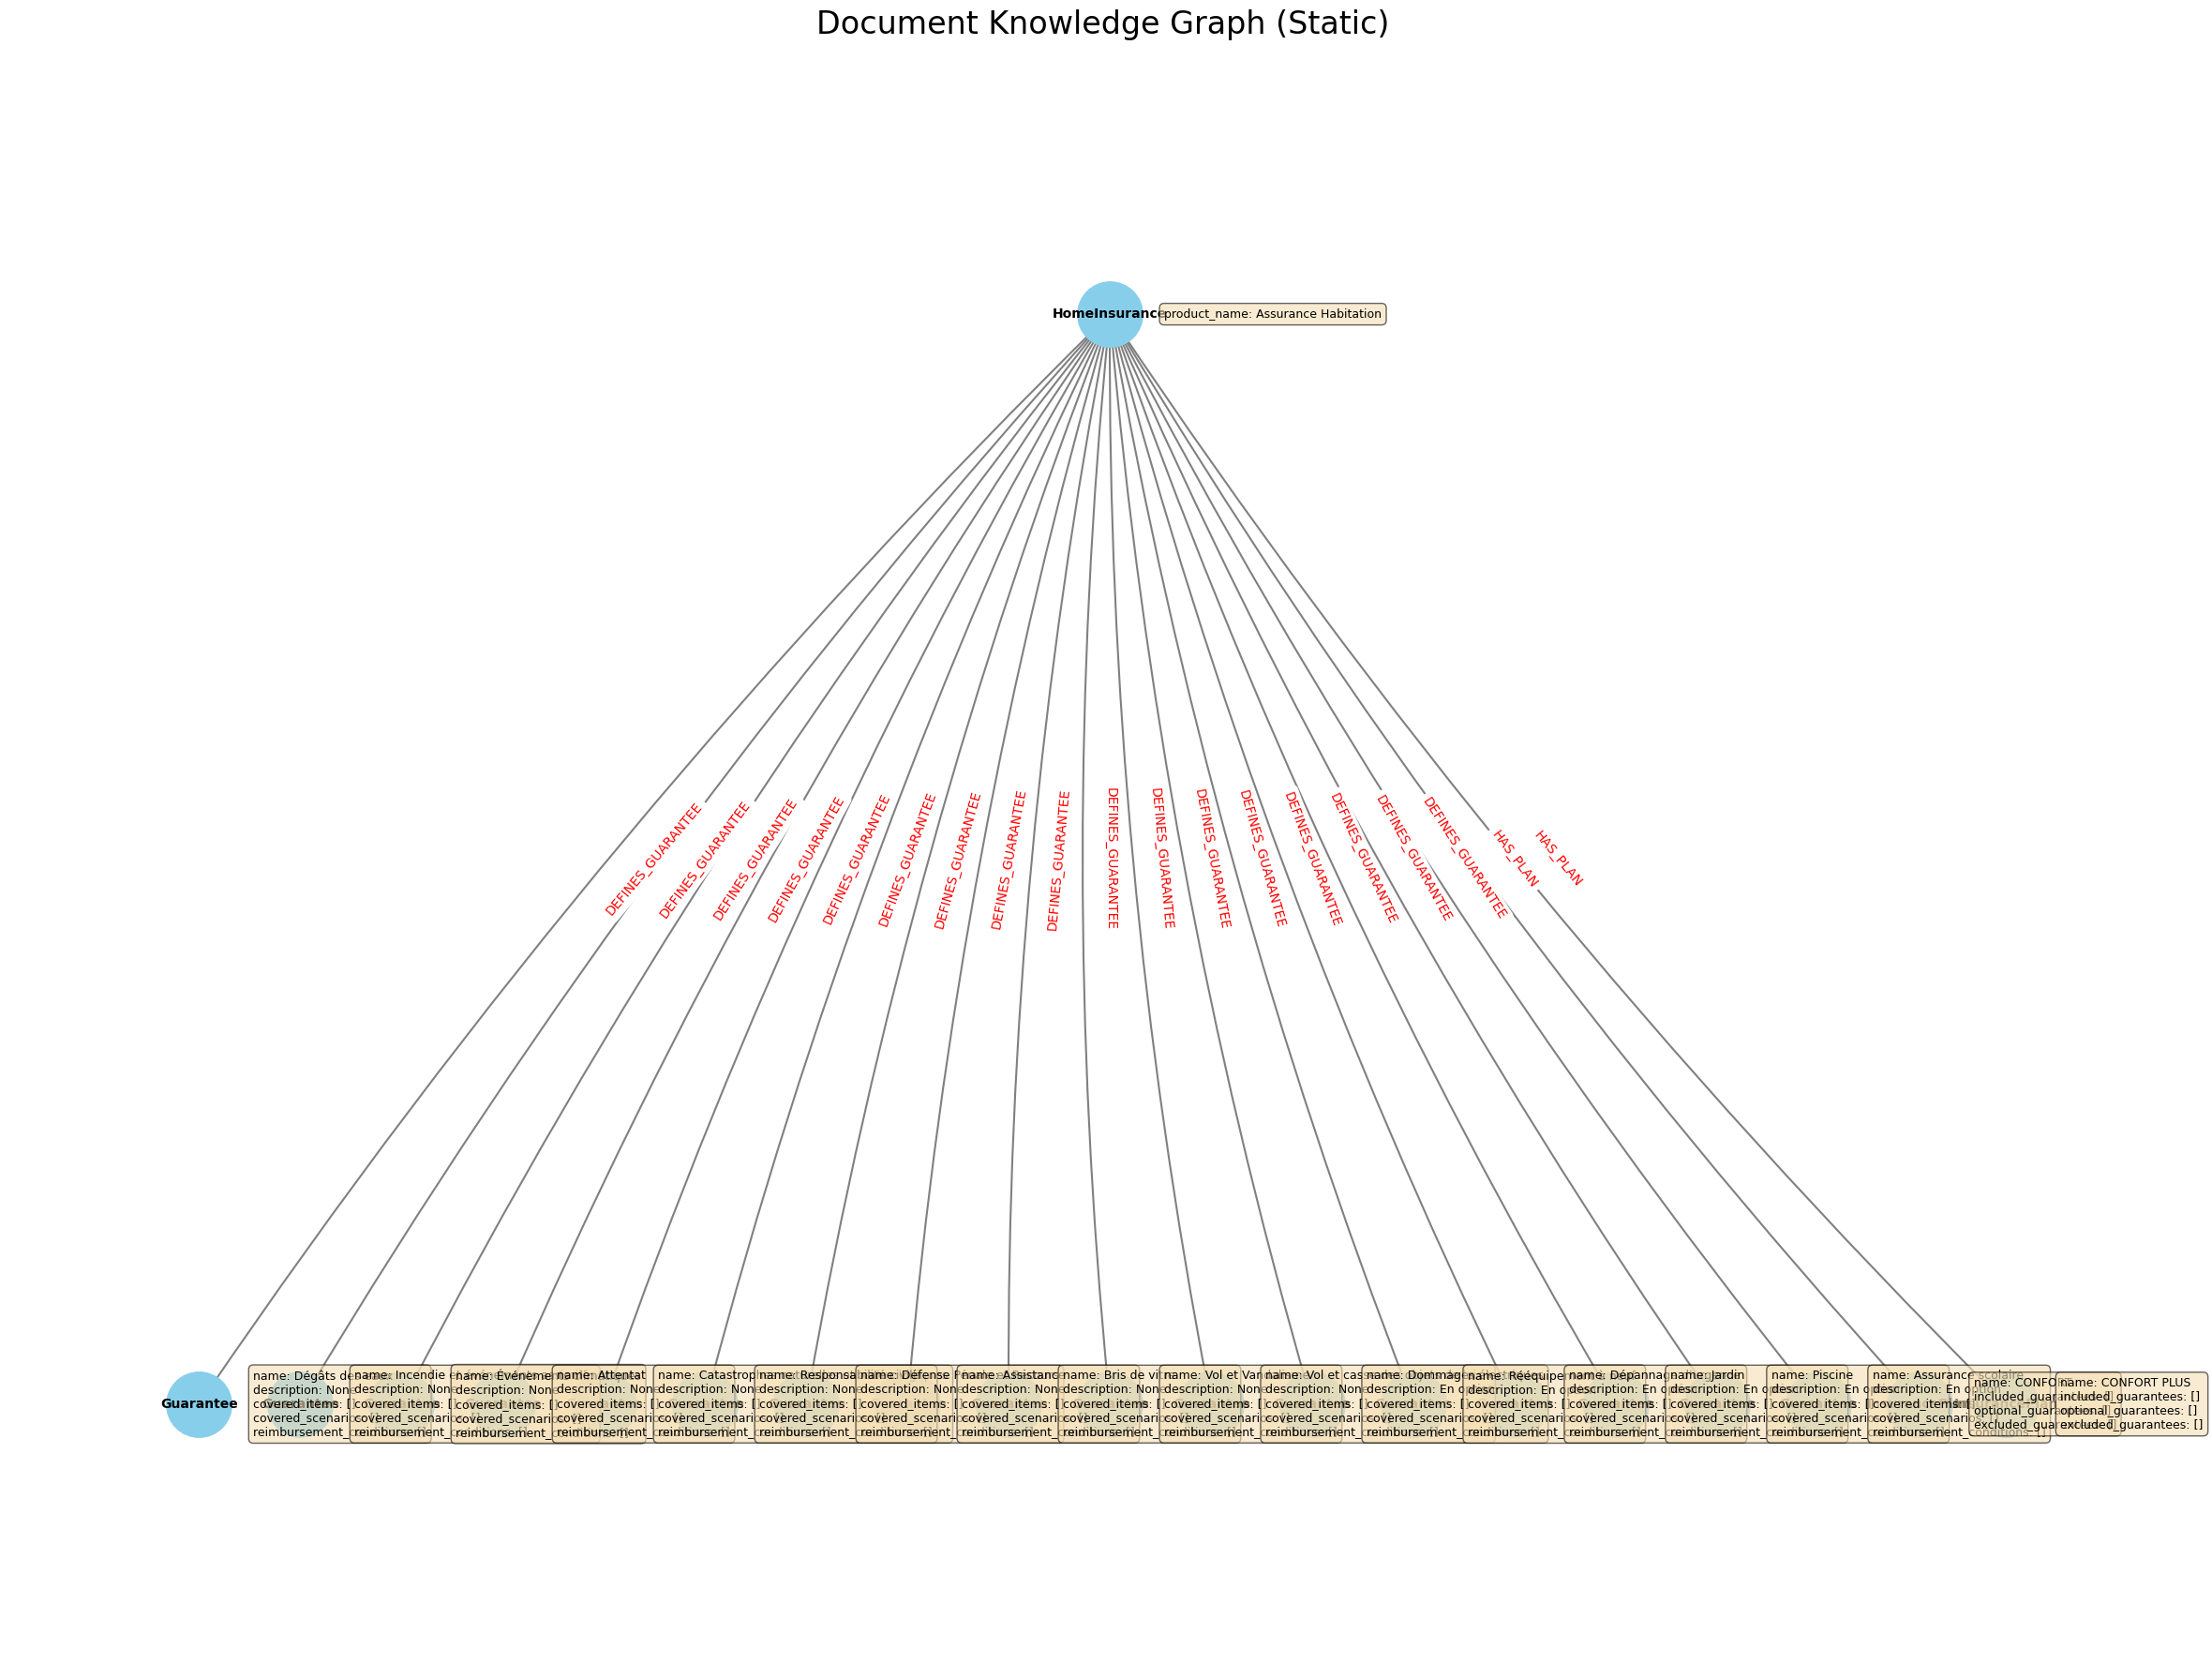

Static graph with properties saved to outputs\invoice_knowledge_graph.png


Graph image created successfully.

In [ ]:
# Draw the graph and save it to a file
static_image_file = "static_graph.png"
create_static_graph(knowledge_graph, filename=static_image_file)
print("[bold green]Graph image created successfully.[/bold green]")

### 3.3. Generate Interactive Visualization with Plotly

In [ ]:
# Create an Interactive Visualization with PyVis
interactive_html_file = "interactive_graph.html"
html_path = create_interactive_graph(knowledge_graph, filename=interactive_html_file)
print("[bold green]Interactive graph created successfully.[/bold green]")

Interactive Plotly graph saved to: outputs\invoice_graph_interactive.html


Interactive graph created successfully.